#Repaso y Preparación para el Laboratorio: SpaCy en Acción

**Duración:** 20 minutos

**Agenda de la Sesión**

En esta guía interactiva, vamos a repasar los conceptos clave de Procesamiento del Lenguaje Natural (PLN) y a realizar una demostración completa del flujo de trabajo con SpaCy. El objetivo es que llegues bien preparado al laboratorio práctico.



1.   Repaso Rápido (5 min): ¿Qué herramientas ya conocemos?
2.   Demostración Interactiva (10 min): Un pipeline de análisis de texto de principio a fin.
3.   Adelanto del Laboratorio (5 min): ¿Cuál será el desafío a resolver?

##Instalación y Configuración del Entorno

Primero, nos aseguramos de tener instaladas las librerías necesarias: `spacy` para el procesamiento de texto y su modelo en español `es_core_news_lg`.

In [1]:
# Instalamos las librerías necesarias en modo silencioso (-q)
!pip install spacy watermark -q #watermark me permite saber con que libreria versiones entorno, en caso de google qu maquina me provee sistema operativo, etc
!python -m spacy download es_core_news_lg -q #modelo largo: lg entrenado en noticias: news

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 3.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
# Importamos las librerías que vamos a utilizar
import spacy
from spacy import displacy #obtenemos algun tipo de vizualizacion, me permite ver las entidades nombradas NER, reconocimiento de entidade snombradas
from collections import Counter #contador para ver frecuencias
import pandas as pd #crear un dataset que se estructura en filas y columnas
from wordcloud import WordCloud #Para vizualizar
import matplotlib.pyplot as plt #Para plotear algun grafico

# Configuramos un estilo visual más prolijo para los gráficos y tablas
plt.style.use('seaborn-v0_8-darkgrid') #Ploteamos el estilo de grafico
pd.set_option('display.max_colwidth', None)

print("Entorno configurado correctamente.") #Siempre tratar de tener una salida

Entorno configurado correctamente.


1. **Repaso: ¿Qué sabemos hasta ahora?**

Antes de sumergirnos en SpaCy, recordemos las herramientas que ya manejamos y que son la base para nuestro trabajo en PLN.

**Nuestro Kit de Herramientas de PLN:**

*   **Fundamentos de Python:**
    *   Manejo de variables, funciones y clases.
    *   Manipulación de strings y estructuras de datos.

*   **Extracción de Datos Web (Web Scraping):**
    *   `BeautifulSoup` para navegar y analizar la estructura HTML de una página.
    *   `Trafilatura` para extraer de forma limpia el texto principal de un artículo.

*   **Análisis con SpaCy (Nuestro foco de hoy):**
    *   Tokenización, Lematización y Part-of-Speech (POS) Tagging.
    *   Reconocimiento de Entidades Nombradas (NER).
    *   Análisis de dependencias sintácticas.

2. **Demostración: Un Pipeline Completo con SpaCy**

Ahora, vamos a ver en acción cómo funciona el flujo de trabajo de SpaCy para analizar una noticia real.

In [3]:
# Cargamos el modelo grande de español
print("Cargando modelo de SpaCy para español...")
nlp = spacy.load("es_core_news_lg")
print(f"Modelo cargado: {nlp.meta['name']} v{nlp.meta['version']}") #Me da la informacion acerca del nombre y version del modelo: METADATA, el metadata nos permite trazar todo el flujo de los datos.
print(f"Componentes del pipeline: {nlp.pipe_names}\n")

# Texto de ejemplo basado en una noticia real
texto_noticia = """
El presidente Javier Milei anunció ayer en Casa Rosada un nuevo plan
de inversiones por 500 millones de dólares. Microsoft Argentina y Mercado Libre
serán las primeras empresas en participar. María González, ministra de Tecnología,
destacó que el proyecto generará 3.000 empleos en Buenos Aires y Córdoba durante 2025.
"""

print("--- Texto a Analizar ---")
print(texto_noticia)

# Procesamos el texto con el modelo
# Esto ejecuta todo el pipeline de SpaCy (tokenizador, tagger, parser, ner, etc.)
doc = nlp(texto_noticia) #convierto al objeto doc ese texto, convertirlo al doc es pasarle el modelo para que reconozca sus patrones sintacticos, gramaticales, lexicos
print(f"\nTexto procesado: se encontraron {len(doc)} tokens.")

Cargando modelo de SpaCy para español...
Modelo cargado: core_news_lg v3.8.0
Componentes del pipeline: ['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

--- Texto a Analizar ---

El presidente Javier Milei anunció ayer en Casa Rosada un nuevo plan
de inversiones por 500 millones de dólares. Microsoft Argentina y Mercado Libre
serán las primeras empresas en participar. María González, ministra de Tecnología,
destacó que el proyecto generará 3.000 empleos en Buenos Aires y Córdoba durante 2025.


Texto procesado: se encontraron 59 tokens.


2.1 **Tokenización Detallada**

El primer paso del pipeline es la tokenización: dividir el texto en sus unidades mínimas (palabras, signos de puntuación). SpaCy no solo divide el texto, sino que enriquece cada token con una gran cantidad de información lingüística. Cuando trabajo con token estoy en presencia de una libreria que comprende la estructura gramatical, me va a ayudar a distinguir que un punto no es un caracter, si no que tiene una funcion gramatical, un token puede ser cualquier cosa por ejemplo un arroba, un token me dice que estoy trabajando en un universo semantico.

In [4]:
print("--- Análisis de los primeros 10 tokens ---")
print(f"{'Token':<15} {'Lema':<15} {'POS':<8} {'¿Stopword?':<12} {'¿Puntuación?'}") #Me hace un espaciado, una separacion de 8/15 caracteres, es para contruir columnas
print("-" * 65)

for token in doc[:10]:
    print(f"{token.text:<15} {token.lemma_:<15} {token.pos_:<8} "
          f"{'Sí' if token.is_stop else 'No':<12} "
          f"{'Sí' if token.is_punct else 'No'}") #Un stopword no introduce sentido en el analisis

--- Análisis de los primeros 10 tokens ---
Token           Lema            POS      ¿Stopword?   ¿Puntuación?
-----------------------------------------------------------------

               
               SPACE    No           No
El              el              DET      Sí           No
presidente      presidente      NOUN     No           No
Javier          Javier          PROPN    No           No
Milei           Milei           PROPN    No           No
anunció         anunciar        VERB     No           No
ayer            ayer            ADV      No           No
en              en              ADP      Sí           No
Casa            Casa            PROPN    No           No
Rosada          Rosada          PROPN    No           No


2.2 **Reconocimiento de Entidades Nombradas (NER)**

El NER es una de las tareas más valiosas en PLN. Consiste en identificar y clasificar entidades del mundo real, como personas, organizaciones, lugares y fechas. Esto nos permite estructurar la información no estructurada del texto.

In [5]:
# Creamos un DataFrame de pandas para una visualización más clara
entidades_data = [] #Creo una lista vacia donde puedo agregar cosas
for ent in doc.ents: #Recorro y extraigo las entidades
    entidades_data.append({
        'Texto': ent.text,
        'Tipo': ent.label_,
        'Explicación': spacy.explain(ent.label_),
    }) #En el dataset voy a agregar Texto (entidad), Label, etiqueta y su significado

df_entidades = pd.DataFrame(entidades_data)

print("--- Entidades Nombradas Detectadas ---")
if not df_entidades.empty:
    print(df_entidades.to_string(index=False))
else:
    print("No se encontraron entidades en el texto.") #Por ejemplo Mercado Libre me puso como LOC, cuando es ORG, eso va a depender del modelo, este tiene limitaciones

--- Entidades Nombradas Detectadas ---
              Texto Tipo                                         Explicación
       Javier Milei  PER                             Named person or family.
        Casa Rosada  LOC Non-GPE locations, mountain ranges, bodies of water
Microsoft Argentina  ORG             Companies, agencies, institutions, etc.
      Mercado Libre  LOC Non-GPE locations, mountain ranges, bodies of water
     María González  PER                             Named person or family.
         Tecnología  PER                             Named person or family.
       Buenos Aires  LOC Non-GPE locations, mountain ranges, bodies of water
            Córdoba  LOC Non-GPE locations, mountain ranges, bodies of water


`displacy` es una herramienta de SpaCy que nos permite generar visualizaciones directamente en el notebook. Usemos el estilo `ent` para resaltar las entidades en el texto original.

In [6]:
displacy.render(doc, style='ent', jupyter=True)

2.3 **Análisis de Acciones y Estructura**

Podemos ir más allá de las entidades y analizar las acciones (verbos) que se mencionan y la estructura sintáctica de las oraciones para entender quién hizo qué.

In [7]:
# Extraemos los verbos principales (lematizados y en minúscula), este grafico lo podemos hacer para textos pequeños, nos permite ver quien o que hizo que
verbos = [token.lemma_.lower() for token in doc if token.pos_ == "VERB" and not token.is_stop]
verbos_freq = Counter(verbos)

print("--- Verbos Principales (Acciones) ---")
if verbos:
    print("Verbos más frecuentes:", verbos_freq.most_common(5))
else:
    print("No se encontraron verbos relevantes.")

# Analizamos la estructura sintáctica de la primera oración
print("\n--- Análisis Sintáctico (primera oración) ---")
primera_oracion = list(doc.sents)[0]
print(f"Oración: '{primera_oracion}'")

displacy.render(primera_oracion, style='dep', jupyter=True, options={'distance': 120, 'compact': True})

--- Verbos Principales (Acciones) ---
Verbos más frecuentes: [('anunciar', 1), ('participar', 1), ('destacar', 1), ('generar', 1)]

--- Análisis Sintáctico (primera oración) ---
Oración: '
El presidente Javier Milei anunció ayer en Casa Rosada un nuevo plan
de inversiones por 500 millones de dólares.'


3. **Análisis Avanzado: Extracción de Insights**

Con la información que nos da SpaCy, podemos realizar análisis más complejos, como la extracción de palabras clave para resumir los temas principales de un texto.

3.1 **Extracción de Palabras Clave**

Para identificar los conceptos más importantes, filtramos los tokens para quedarnos solo con sustantivos, verbos y nombres propios que no sean stopwords.

In [8]:
# Filtramos para obtener palabras clave significativas
palabras_clave = [
    token.lemma_.lower() for token in doc
    if (token.is_alpha and
        not token.is_stop and
        len(token.text) > 2 and
        token.pos_ in ['NOUN', 'VERB', 'PROPN'])
]

frecuencia_palabras = Counter(palabras_clave)

print("--- Top 5 Palabras Clave ---") #Entendio la libreria las relaciones y depedencias que hay entre los elementos, una cosa es repetir palabras y otra repetir tokens, analiza dependencias en los tokenes, que termino tiene relaion con este otro
for palabra, freq in frecuencia_palabras.most_common(5):
    print(f"  • {palabra}: {freq} mención(es)")

--- Top 5 Palabras Clave ---
  • presidente: 1 mención(es)
  • javier: 1 mención(es)
  • milei: 1 mención(es)
  • anunciar: 1 mención(es)
  • casa: 1 mención(es)


3.2 **Nube de Palabras**

Una forma visualmente atractiva de presentar las palabras clave es a través de una nube de palabras, donde el tamaño de cada palabra es proporcional a su frecuencia.

--- Generando Nube de Palabras ---


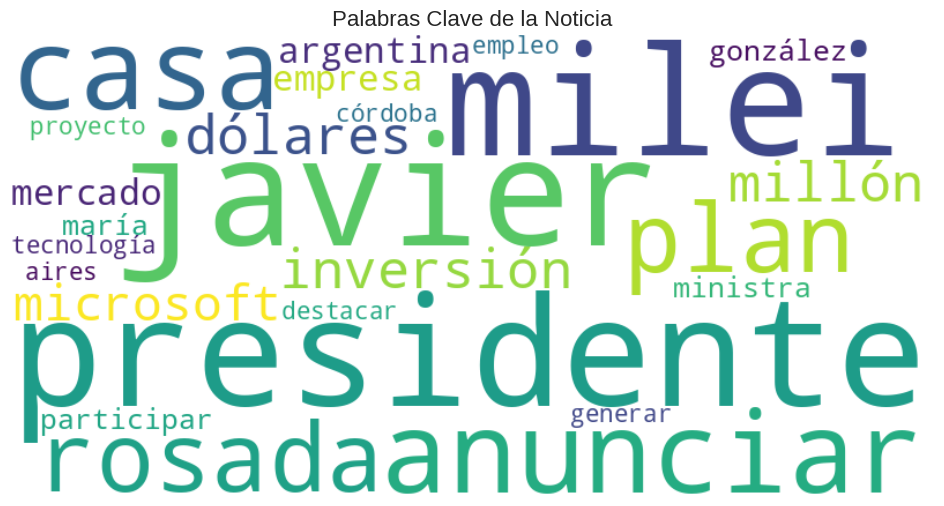

In [9]:
if frecuencia_palabras:
    print("--- Generando Nube de Palabras ---")

    wordcloud = WordCloud(
        width=800, height=400, background_color='white',
        colormap='viridis', max_words=50,
    ).generate_from_frequencies(frecuencia_palabras)

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title('Palabras Clave de la Noticia', fontsize=16)
    ax.axis('off')
    plt.show()

4. **Adelanto: Lo que van a hacer en el Laboratorio**

Ahora que repasamos las herramientas, les adelantamos la misión que tendrán en el próximo laboratorio práctico.

**La Misión del Laboratorio: "Analizador de Tendencias en Noticias"**

El objetivo final es construir una herramienta que, a partir de una lista de URLs de noticias, pueda generar un reporte automático que identifique:

*   Las personas más mencionadas del día.
*   Las organizaciones más relevantes.
*   Los temas y acciones principales.

**Etapas del Laboratorio:**

1.  **Extracción Web (15 min):** Usar `trafilatura` para obtener el texto de noticias reales de forma automática.
2.  **Análisis con SpaCy (20 min):** Crear una clase `AnalizadorNoticia` que encapsule la lógica para extraer entidades, verbos y estadísticas.
3.  **Visualización (20 min):** Generar nubes de palabras y gráficos de barras para presentar los resultados.
4.  **Pipeline Completo (10 min):** Integrar todo en un sistema que procese múltiples noticias y genere un reporte de tendencias.

5. **Tips Finales para el Laboratorio**

Para que encaren el laboratorio con éxito, les dejamos algunos consejos y un resumen de comandos útiles.

**Tips para el Éxito:**

*   **Para depurar (debugging):**
    *   Usá `print(type(variable))` para verificar el tipo de dato con el que estás trabajando.
    *   Recordá que `doc.ents` puede estar vacío. Siempre es bueno verificar si tiene contenido antes de intentar usarlo.
    *   Si `trafilatura` falla con una URL, probá con otra. No todas las webs están estructuradas de la misma manera.

*   **Enfoque de trabajo:**
    *   Avanzá por partes. Asegurate de que la extracción funcione antes de empezar con el análisis.
    *   Es preferible una función simple que funcione, a una compleja que dé errores.
    *   Probá tu código con textos cortos y controlados antes de usarlo con noticias largas.

**Resumen Rápido de SpaCy:**

*   `token.text`: El texto original del token (ej: "corrió").
*   `token.lemma_`: La forma base o lema (ej: "correr").
*   `token.pos_`: La categoría gramatical (ej: "VERB", "NOUN").
*   `token.dep_`: La dependencia sintáctica (ej: "nsubj", "dobj").
*   `doc.ents`: La secuencia de entidades encontradas en el documento.
*   `doc.sents`: El generador de oraciones del documento.

¡Ahora sí, están listas y listos para empezar a trabajar! El objetivo es aprender aplicando estos conceptos. ¡No teman experimentar!